# Introduction to Matplotlib

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

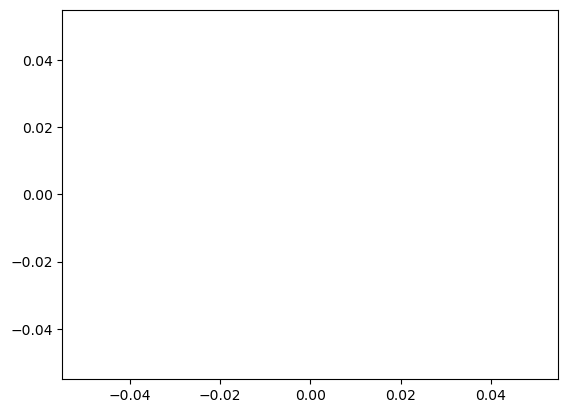

In [2]:
plt.plot(); # removes [] in output

#plt.plot()
#plt.show()
# same results as plt.plot();

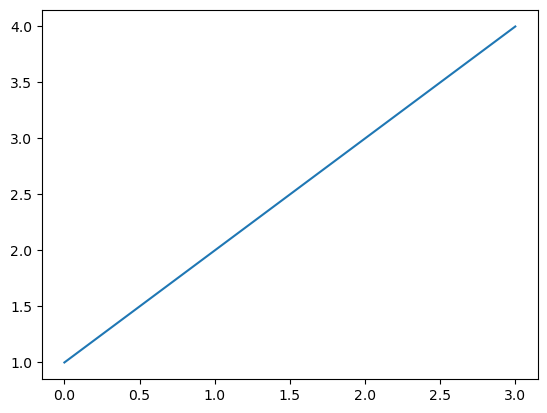

In [3]:
plt.plot([1,2,3,4]);

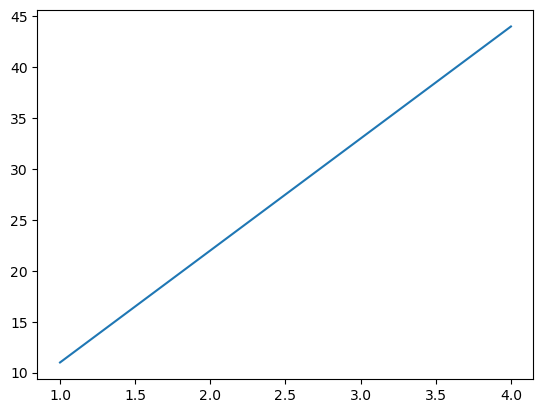

In [4]:
x = [1,2,3,4]
y = [11,22,33,44]
plt.plot(x,y);

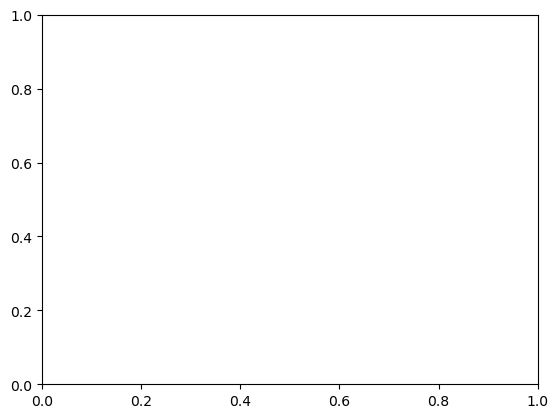

In [5]:
# 1st method
fig=plt.figure() # creates a figure
ax = fig.add_subplot()
plt.show()

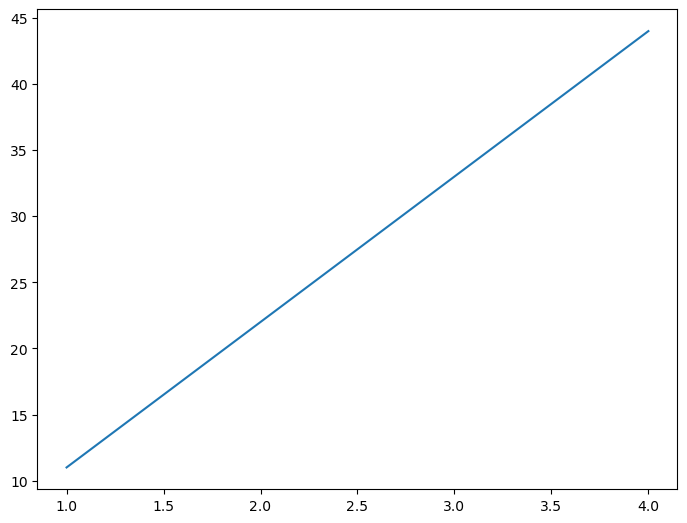

In [6]:
# 2nd method
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.plot(x,y)
plt.show()

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

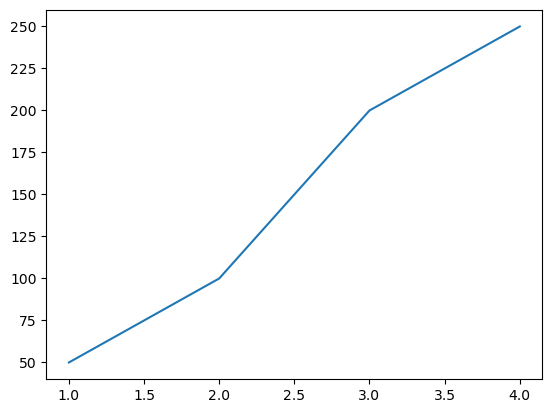

In [7]:
# 3rd method (recommended)
fig, ax = plt.subplots()
ax.plot(x, [50, 100, 200, 250]); # add some data
type(fig), type(ax)

## Matplotlib example workflow

[Text(0.5, 1.0, 'Simple Plot'), Text(0.5, 0, 'x'), Text(0, 0.5, 'y')]

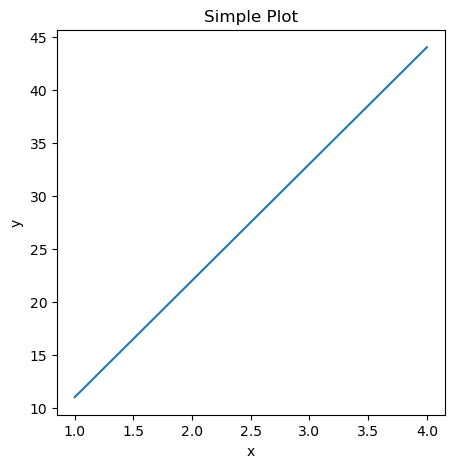

In [8]:
# 0. import matplotlib and get it ready for plotting
import matplotlib.pyplot as plt

#1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

#2. Setup ploy
fig, ax = plt.subplots(figsize=(5, 5)) # width, height

#3. plot data
ax.plot(x, y)

#4. Customize plot
ax.set(title="Simple Plot",
       xlabel="x",
       ylabel="y")

#5. Save & show (you save the whole figure)
#fig.savefig("../data/images/sample-plot.png")


## Making figures with NumPy arrays

We want:
* Line plot
* Scatter plot
* Bar plot
* Histogram
* Subplots

In [9]:
# Create some data
x = np.linspace(0, 10, 100)

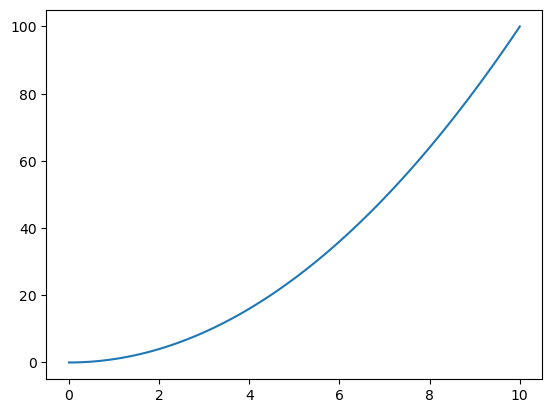

In [10]:
# Plot the data and create a line plot
fig, ax = plt.subplots()
ax.plot(x, x**2);

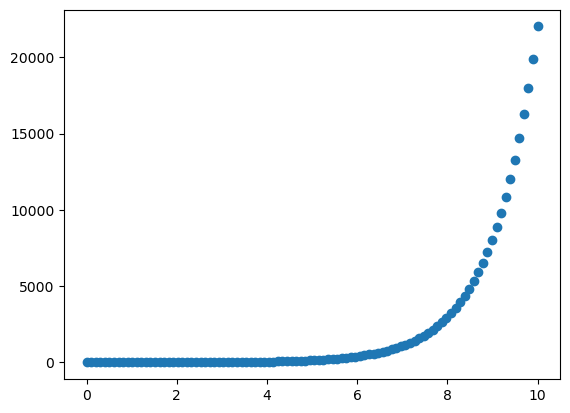

In [11]:
# Use same data to make a scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

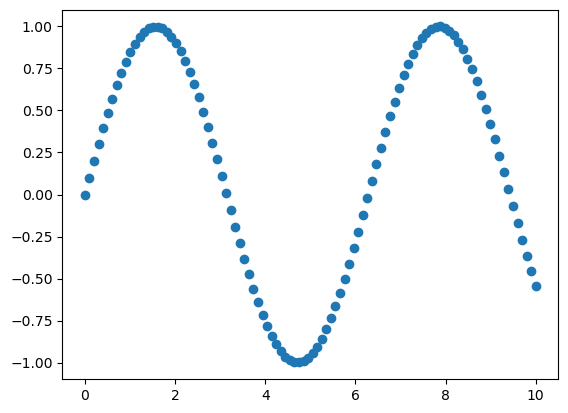

In [12]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x))

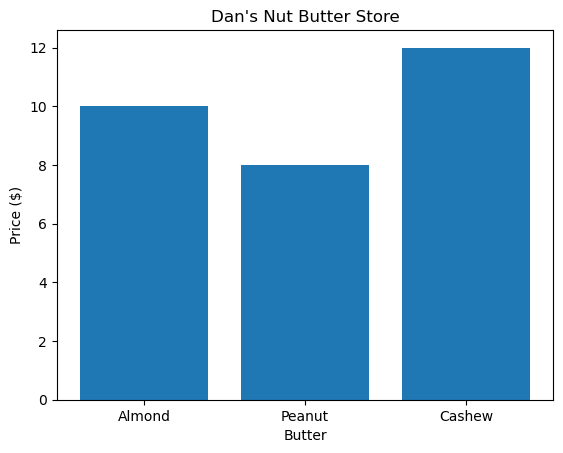

In [13]:
# Make a plot from a dictionary

nut_butter_prices = {"Almond": 10,
                     "Peanut": 8,
                     "Cashew": 12}

fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Dan's Nut Butter Store",
       ylabel="Price ($)",
       xlabel="Butter");

<BarContainer object of 3 artists>

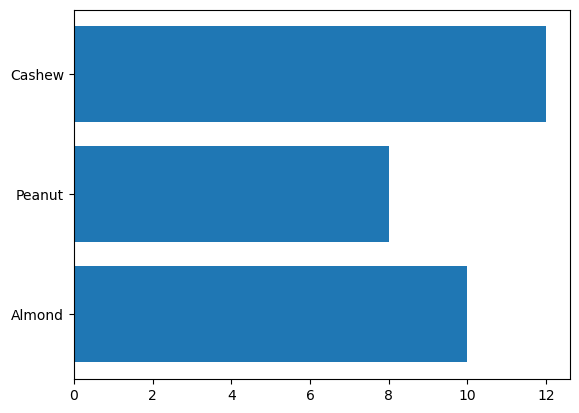

In [14]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()))

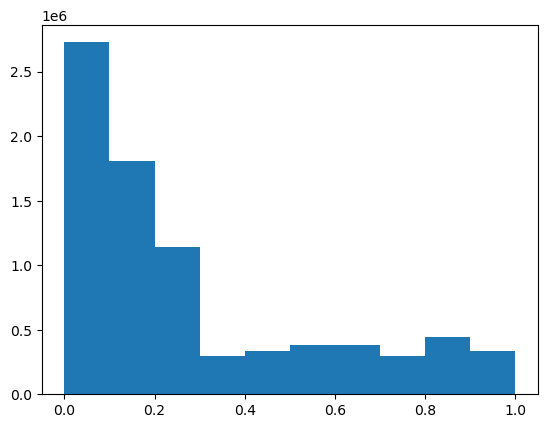

In [15]:
# Import image to analyze in histogram
from matplotlib.image import imread

panda = imread("../data/images/panda.png")

color_to_grayscale = np.array([0.299, 0.587, 0.114])

grey_panda = panda.dot(color_to_grayscale)

grey_panda_array = grey_panda.reshape(grey_panda.size, 1)

fig, ax = plt.subplots()
ax.hist(grey_panda_array);


## Two options for subplots

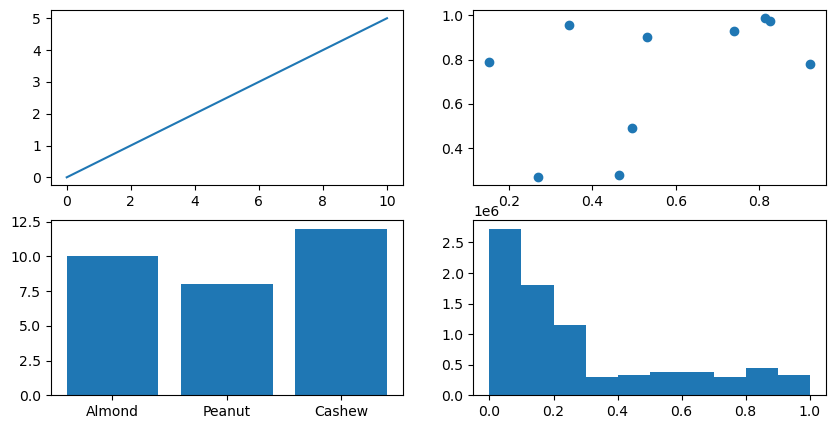

In [16]:
# Subplots option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                             ncols=2,
                                             figsize=(10,5))

# Plot to each different axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(grey_panda_array);

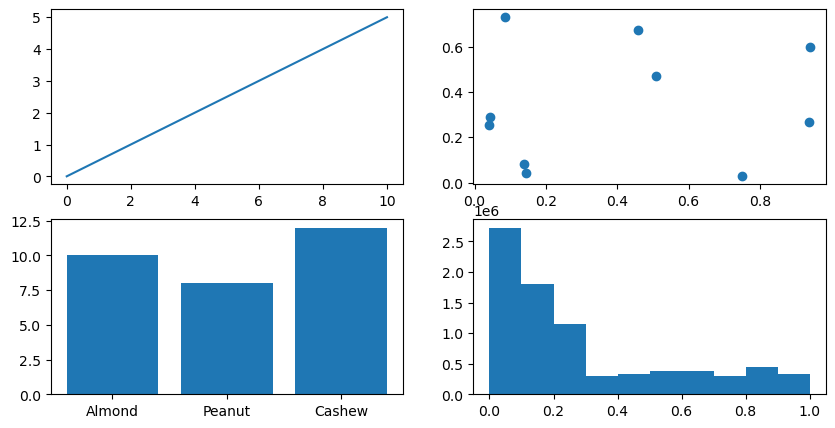

In [17]:
# Subplots option 2
fig, ax = plt.subplots(nrows=2,
                       ncols=2,
                       figsize=(10, 5))

# Plot to all indices
ax[0, 0].plot(x, x/2);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1, 1].hist(grey_panda_array);

## Plotting from pandas DataFrames

In [18]:
car_sales = pd.read_csv('../data/car-sales.csv')

In [19]:
#ts = pd.Series(np.random.randn(1000),
#               index=pd.date_range('25/6/2024', periods=1000))

#s = ts.cumsum()
#ts.plot();

In [20]:
# Remove $,. from price and convert to float
car_sales["Price"] = car_sales["Price"].replace(regex='[$,.]', value='').astype(float) / 100

In [21]:
car_sales["Sale Date"] = pd.date_range('1/1/2020', periods=len(car_sales))

In [22]:
car_sales["Total Sales"] = car_sales["Price"].cumsum()

In [23]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000.0,2020-01-01,4000.0
1,Honda,Red,87899,4,5000.0,2020-01-02,9000.0
2,Toyota,Blue,32549,3,7000.0,2020-01-03,16000.0
3,BMW,Black,11179,5,22000.0,2020-01-04,38000.0
4,Nissan,White,213095,4,3500.0,2020-01-05,41500.0
5,Toyota,Green,99213,4,4500.0,2020-01-06,46000.0
6,Honda,Blue,45698,4,7500.0,2020-01-07,53500.0
7,Honda,Blue,54738,4,7000.0,2020-01-08,60500.0
8,Toyota,White,60000,4,6250.0,2020-01-09,66750.0
9,Nissan,White,31600,4,9700.0,2020-01-10,76450.0


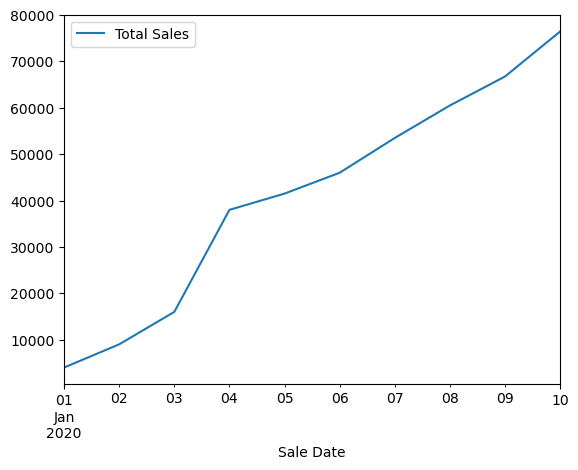

In [24]:
# Let's plot the total sales
car_sales.plot(x="Sale Date", y="Total Sales");

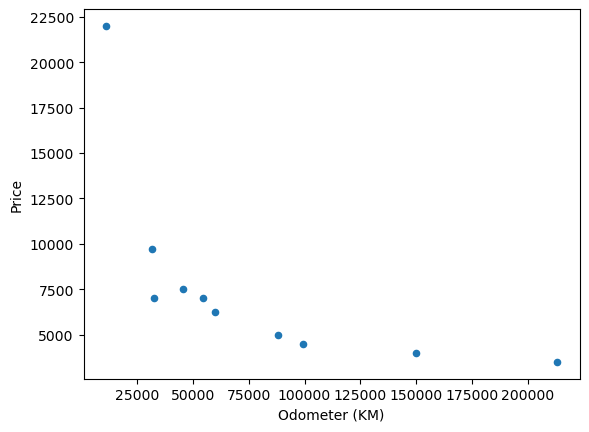

In [25]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

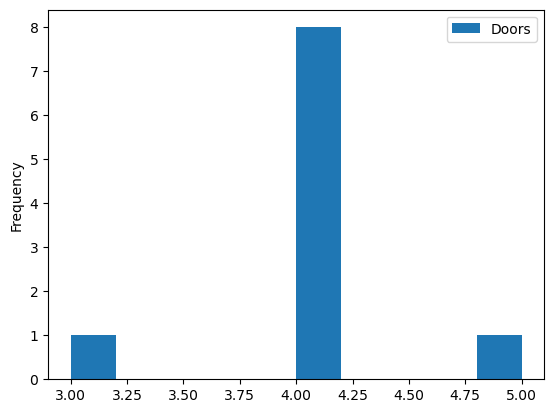

In [26]:
car_sales.plot(y="Doors", kind="hist");

In [27]:
# How about a bar graph?
x = np.random.rand(10,4)

# Turn it into a DataFrame
df = pd.DataFrame(x, columns=["a", "b", "c", "c"])
df

,a,b,c,c
0,0.149381,0.914374,0.316354,0.626008
1,0.179235,0.563847,0.679432,0.487627
2,0.571478,0.582580,0.811049,0.151622
3,0.585128,0.393847,0.406364,0.657495
4,0.317588,0.727479,0.447503,0.621317
5,0.581966,0.526982,0.046795,0.269541
6,0.061870,0.410890,0.190517,0.899613
7,0.162201,0.157117,0.141492,0.336446
8,0.376220,0.067049,0.772356,0.135667
9,0.846398,0.903456,0.645922,0.983759


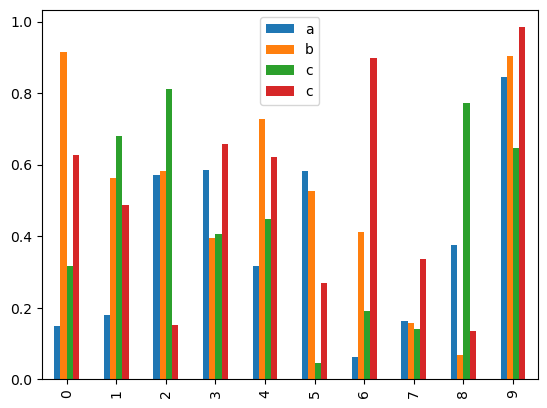

In [28]:
df.plot.bar();

In [29]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000.0,2020-01-01,4000.0
1,Honda,Red,87899,4,5000.0,2020-01-02,9000.0
2,Toyota,Blue,32549,3,7000.0,2020-01-03,16000.0
3,BMW,Black,11179,5,22000.0,2020-01-04,38000.0
4,Nissan,White,213095,4,3500.0,2020-01-05,41500.0
5,Toyota,Green,99213,4,4500.0,2020-01-06,46000.0
6,Honda,Blue,45698,4,7500.0,2020-01-07,53500.0
7,Honda,Blue,54738,4,7000.0,2020-01-08,60500.0
8,Toyota,White,60000,4,6250.0,2020-01-09,66750.0
9,Nissan,White,31600,4,9700.0,2020-01-10,76450.0


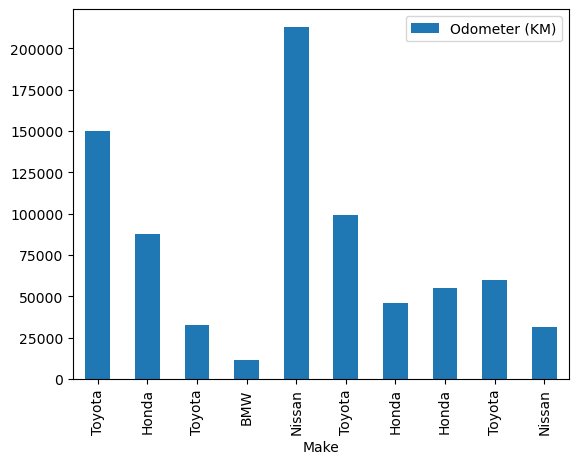

In [30]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar");

In [31]:

# Extra create Average KM column
car_sales['Average KM'] = car_sales.groupby(['Make'])[["Odometer (KM)"]].transform("mean")
car_sales


,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales,Average KM
0,Toyota,White,150043,4,4000.0,2020-01-01,4000.0,85451.250000
1,Honda,Red,87899,4,5000.0,2020-01-02,9000.0,62778.333333
2,Toyota,Blue,32549,3,7000.0,2020-01-03,16000.0,85451.250000
3,BMW,Black,11179,5,22000.0,2020-01-04,38000.0,11179.000000
4,Nissan,White,213095,4,3500.0,2020-01-05,41500.0,122347.500000
5,Toyota,Green,99213,4,4500.0,2020-01-06,46000.0,85451.250000
6,Honda,Blue,45698,4,7500.0,2020-01-07,53500.0,62778.333333
7,Honda,Blue,54738,4,7000.0,2020-01-08,60500.0,62778.333333
8,Toyota,White,60000,4,6250.0,2020-01-09,66750.0,85451.250000
9,Nissan,White,31600,4,9700.0,2020-01-10,76450.0,122347.500000


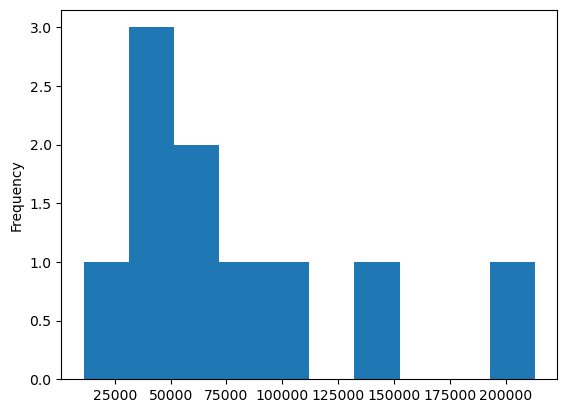

In [32]:
# How about histograms?
car_sales["Odometer (KM)"].plot.hist();

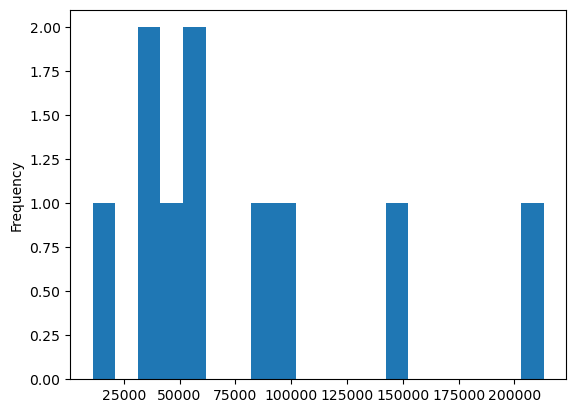

In [33]:
car_sales['Odometer (KM)'].plot.hist(bins=20);

In [34]:
# Let's try another dataset
heart_disease = pd.read_csv('../heart disease/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


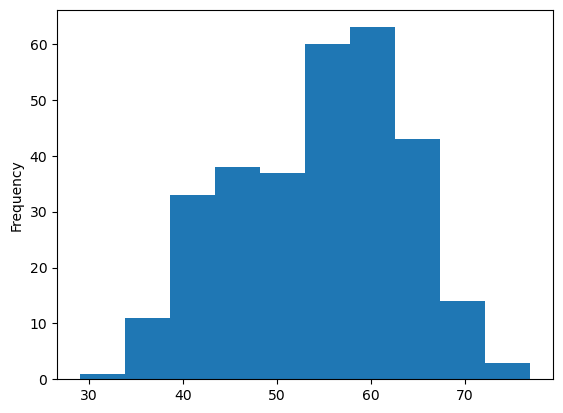

In [35]:
# Create a histogram of age
heart_disease['age'].plot.hist(bins=10);

In [36]:
#heart_disease.plot.hist(subplots=True, figsize=(10,30));

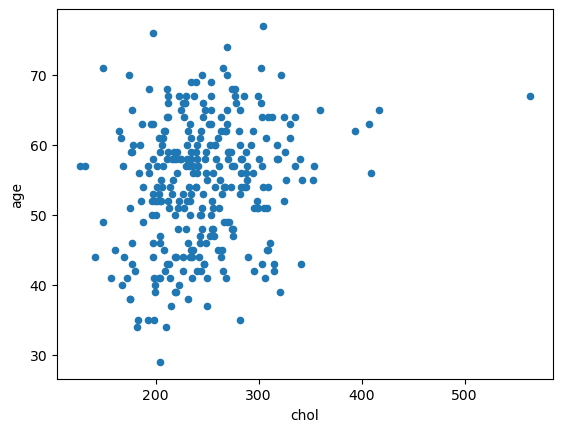

In [37]:
heart_disease.plot(x="chol", y="age", kind="scatter");

### Which one should you use? (pyplot vs matplotlib OO method?)

* When plotting something quickly, okay to use the pyplot method
* When plotting something more advanced, use the OO method

In [38]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: ylabel='Frequency'>

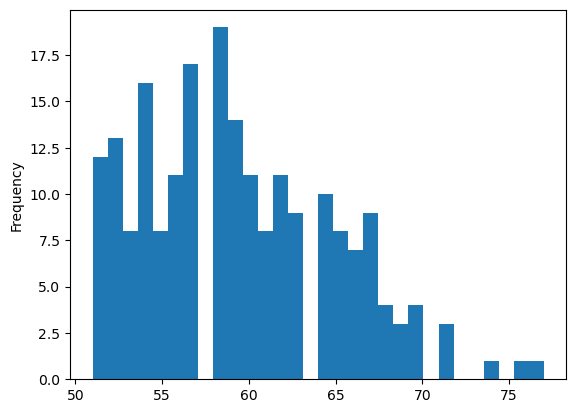

In [39]:
over_50["age"].plot.hist(bins=30)

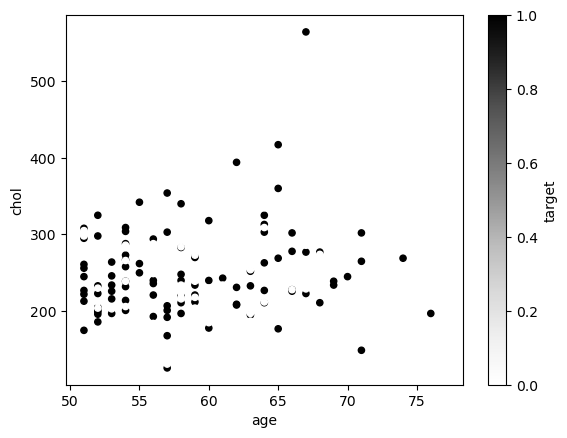

In [40]:
# Pyplot method

over_50.plot(kind="scatter", x="age", y="chol", c="target");

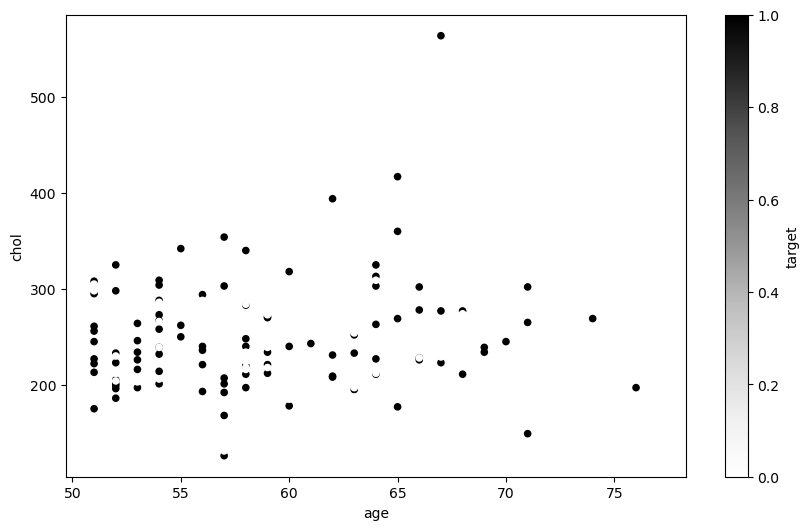

In [41]:
# OO method mix with pyplot method
fig, ax = plt.subplots(figsize=(10,6))
over_50.plot(kind='scatter',
             x='age',
             y='chol',
             c='target',
             ax=ax);

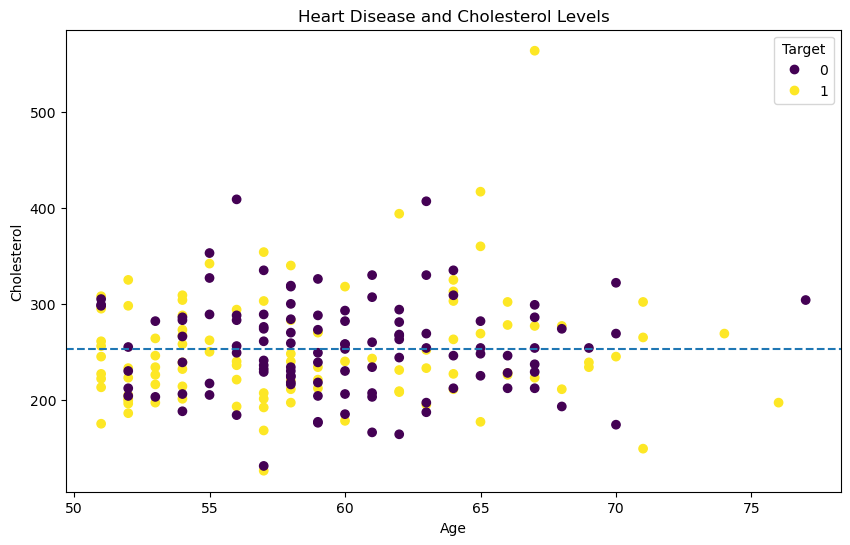

In [42]:
## OO method from scratch
fig, ax = plt.subplots(figsize=(10,6))

#Plot the data
scatter = ax.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"]);

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");

#Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

#Add average cholesterol line
ax.axhline(over_50["chol"].mean(),
           linestyle='--');

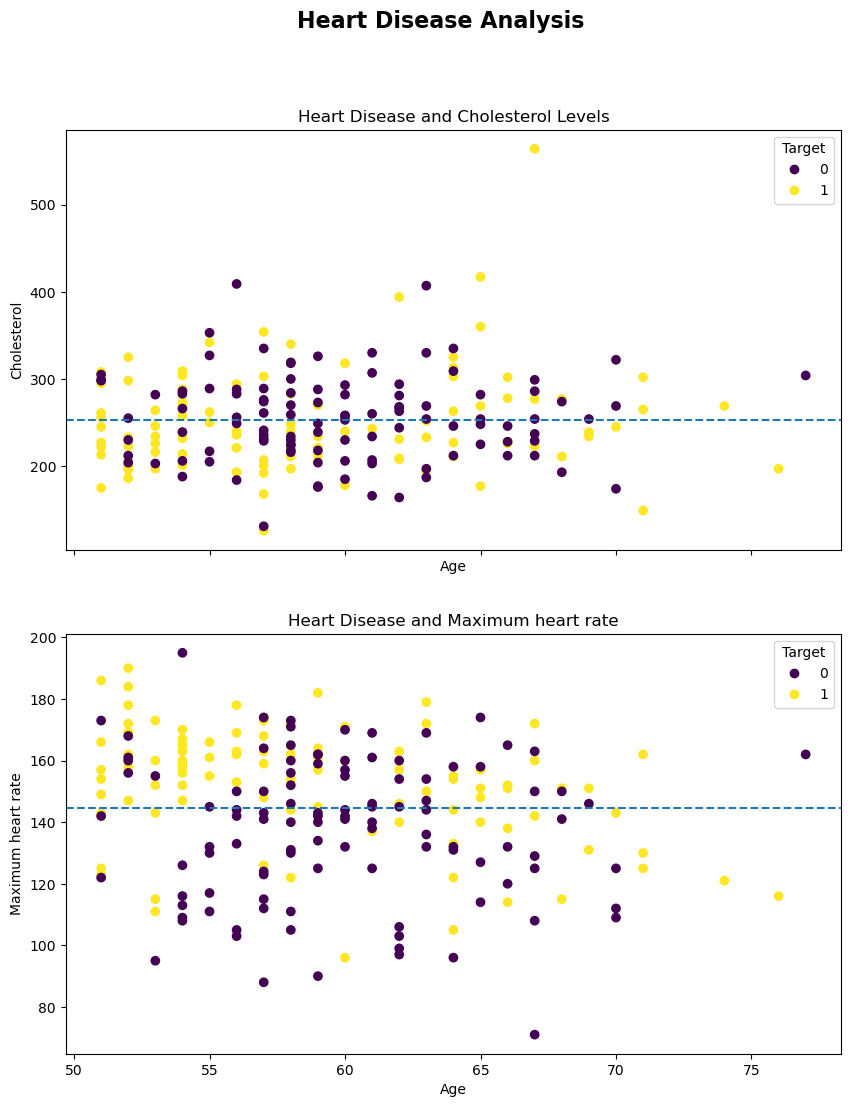

In [43]:
#Create subplot with age & chol + age & thalach
fig, (ax1, ax2) = plt.subplots(ncols=1,
                               nrows=2, 
                               figsize=(10,12),
                               sharex=True)

def scatter_subplot(df, x, y, c, ax, title, xlabel, ylabel, clabel):
       scatter = ax.scatter(x=df[x],
                            y=df[y],
                            c=df[c])

       ax.set(title=title,
              xlabel=xlabel,
              ylabel=ylabel)

       ax.legend(*scatter.legend_elements(), title=clabel)

       ax.axhline(over_50[y].mean(),
                   linestyle='--')

scatter_subplot(over_50, 'age', 'chol', 'target', ax1, "Heart Disease and Cholesterol Levels", "Age", "Cholesterol", "Target");
scatter_subplot(over_50, 'age', 'thalach', 'target', ax2, "Heart Disease and Maximum heart rate", "Age", "Maximum heart rate", "Target");

fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight='bold');

## Customizing Matplotlib plots

In [44]:
# See the different styles available

plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

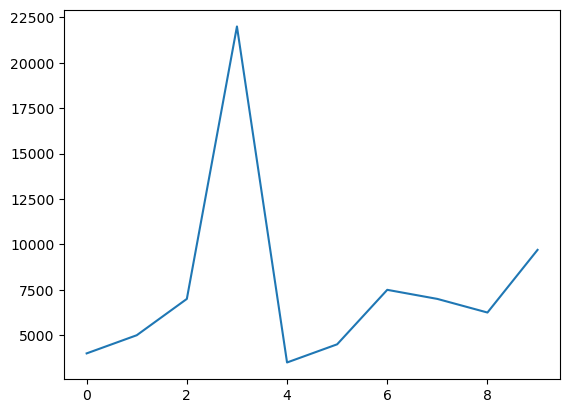

In [45]:
car_sales["Price"].plot();

In [46]:
plt.style.use('seaborn-v0_8')

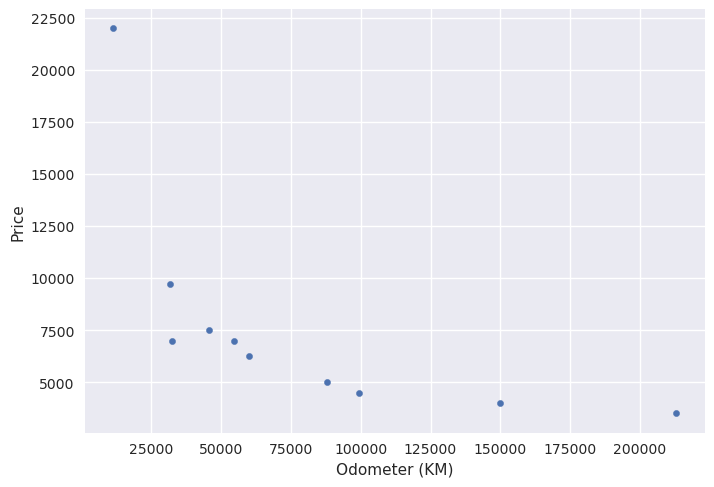

In [47]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

<Axes: >

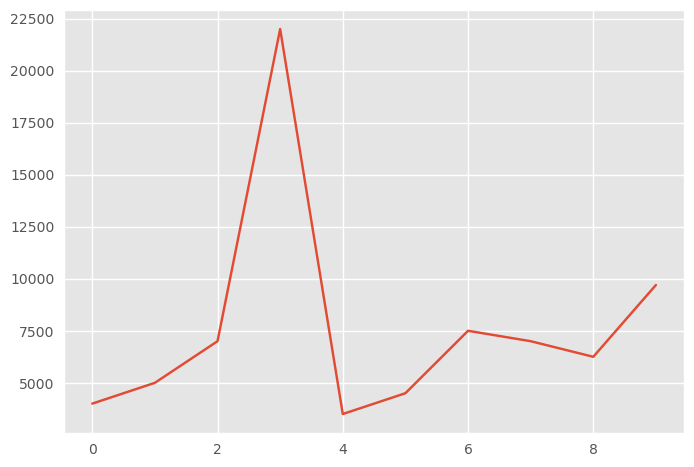

In [48]:
plt.style.use('ggplot')
car_sales["Price"].plot()

In [49]:
# Create some data
x = np.random.randn(10, 4)

df = pd.DataFrame(x, columns=["a", "b", "c", "c"])

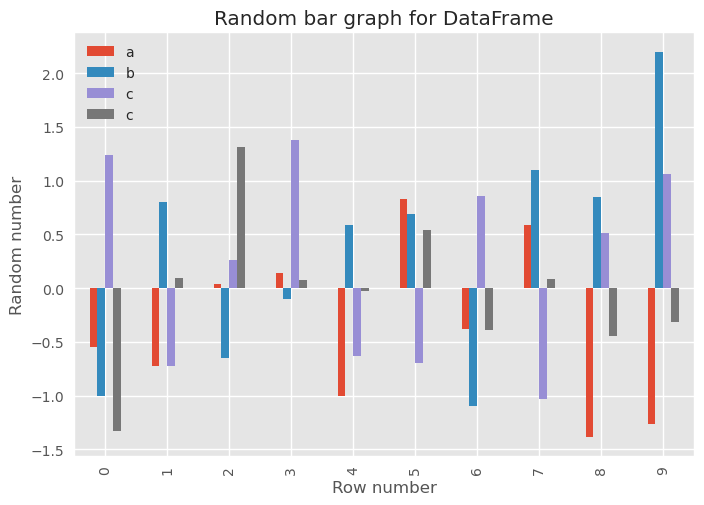

In [50]:
# Customize our plot with the set() method
ax = df.plot(kind="bar")
# Add some labels and a title
ax.set(title="Random bar graph for DataFrame",
       xlabel="Row number",
       ylabel="Random number");

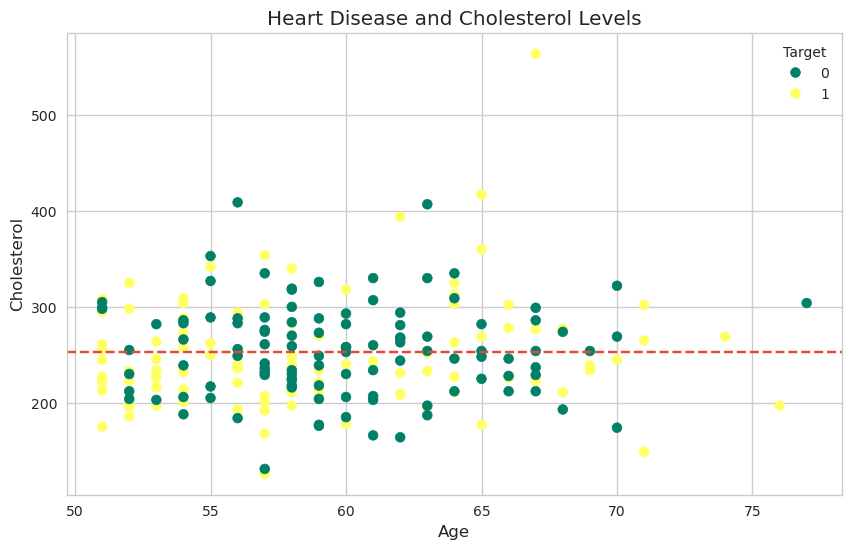

In [52]:
#Set up style
plt.style.use('seaborn-v0_8-whitegrid')

## OO method from scratch
fig, ax = plt.subplots(figsize=(10,6))

#Plot the data
scatter = ax.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"],
                     cmap="summer"); # this change the colour scheme

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");

#Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

#Add average cholesterol line
ax.axhline(over_50["chol"].mean(),
           linestyle='--');

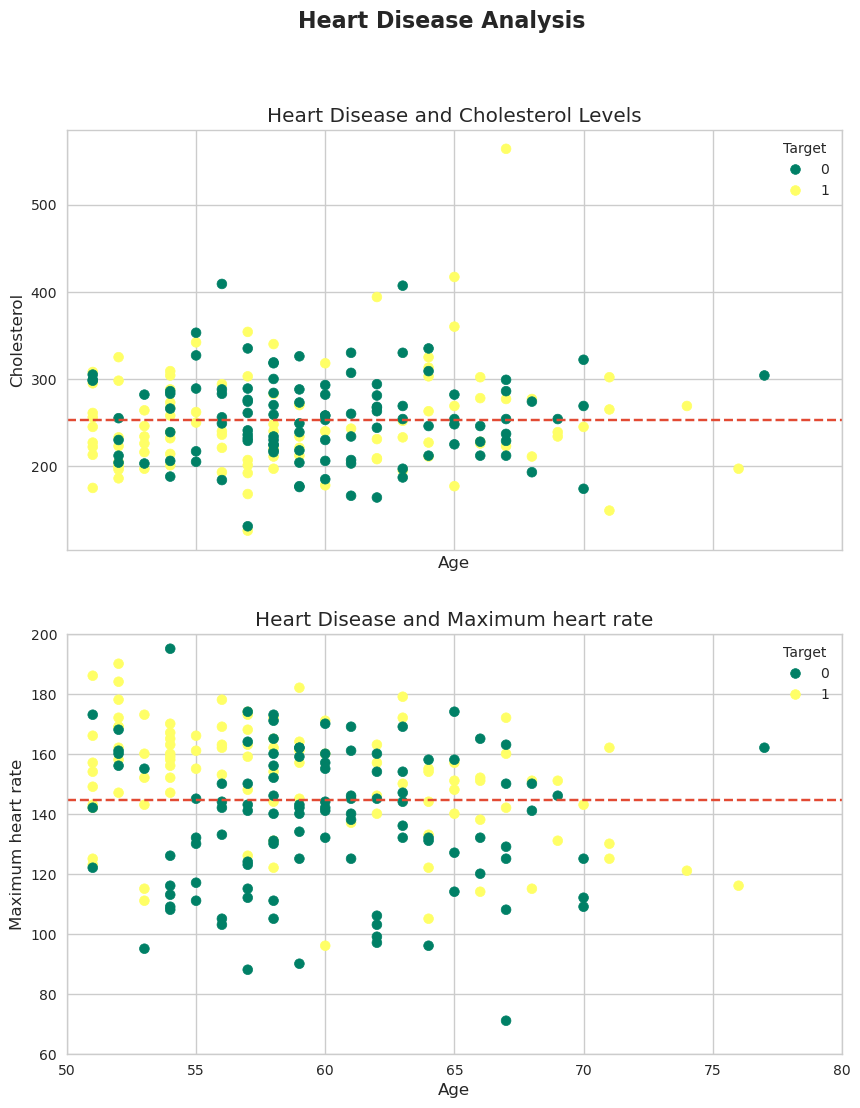

In [55]:
#Create subplot with age & chol + age & thalach
fig, (ax1, ax2) = plt.subplots(ncols=1,
                               nrows=2, 
                               figsize=(10,12),
                               sharex=True)

def scatter_subplot(df, x, y, c, ax, title, xlabel, ylabel, clabel, xlim, ylim = None):
       scatter = ax.scatter(x=df[x],
                            y=df[y],
                            c=df[c],
                            cmap="summer")

       ax.set(title=title,
              xlabel=xlabel,
              ylabel=ylabel)
       
       ax.set_xlim(xlim)
       if ylim:
        ax.set_ylim(ylim)

       ax.legend(*scatter.legend_elements(), title=clabel)

       ax.axhline(over_50[y].mean(),
                   linestyle='--')

scatter_subplot(over_50, 'age', 'chol', 'target', ax1, "Heart Disease and Cholesterol Levels", "Age", "Cholesterol", "Target", [50,80]);
scatter_subplot(over_50, 'age', 'thalach', 'target', ax2, "Heart Disease and Maximum heart rate", "Age", "Maximum heart rate", "Target", [50,80], [60, 200]);

fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight='bold');

In [56]:
#fig.savefig("heart-disease-analysis.png")